# Question 1

### Question A
A **Classification Decision Tree** is a supervised learning model used to solve **classification problems**. These problems involve predicting the **categorical label** of an input based on its features. For example, determining whether an email is "spam" or "not spam," whether a patient has a disease ("yes" or "no"), or identifying the species of a flower ("setosa," "versicolor," or "virginica") based on its measurements.  

In real-world applications, Classification Decision Trees are particularly useful in:  
1. **Medical Diagnosis**: Predicting whether a tumor is malignant or benign based on patient data.  
2. **Customer Segmentation**: Classifying customers into segments for marketing campaigns.  
3. **Credit Risk Assessment**: Determining whether a loan applicant is likely to default.  
4. **Fraud Detection**: Identifying whether a transaction is fraudulent or legitimate.  

Classification problems differ from regression problems in that the output in classification is discrete (e.g., categories or classes), whereas regression predicts continuous values (e.g., house prices or stock values).  

---
### Question B
A **Classification Decision Tree** makes predictions by sequentially dividing the input space into regions using a tree-like structure of **nodes**.  

1. **Nodes and Splits**: At each node in the tree, a decision is made based on a feature and a threshold (e.g., "Is feature X > 5?").  
2. **Branches**: Based on the answer (yes/no), the input moves down one of the tree's branches to the next node.  
3. **Leaf Nodes**: This process continues until the input reaches a leaf node, which represents a **final class prediction** (e.g., "spam" or "not spam").  

The decision-making process is hierarchical and interpretable, as each decision splits the data into smaller subsets.  

In contrast, **Multiple Linear Regression** works differently:  
1. **Prediction in Regression**: It models the relationship between features and a continuous output by fitting a linear equation:  
   $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + \dots + \beta_nx_n$
   Predictions are made by substituting input feature values into this equation to compute a continuous output \(y\).  

2. **Key Difference**:  
   - A **decision tree** makes predictions by following a sequence of decisions down a tree and outputs discrete classes.  
   - **Linear regression** predicts continuous values by calculating a weighted sum of input features.  

# Question 2

### 1. Accuracy
Accuracy is useful for evaluating overall performance and can be used when the dataset is balanced and the costs of false positives and false negatives are similar, so that no specific type of error is more critical than the other. This is used for assessing the overall performance of a recommendation system. 
Situations where it makes sense to use this is when you are evaluating models for general classification tasks like:
- Accuracy of weather predictions (rain/no rain)
- Accuracy of email spam filter (got it right/didn't get it right)

### 2. Sensitivity
sensitivity is important when the goal is to assess the model's ability to identify as many true positives as possible, even if some false positives occur. Critical in high-stakes scenarios where missing a positive case could lead to severe consequences or when maximizing true positives is the goal. This is most important to evalute your model specifically when it can't afford to miss a positive case.
Situations where it makes sense to use this is when you are:
- Trying to detect diseases 
- Identifying fraud cases where missing a true fraud could lead to a lot of financial loss
- Tracking endangered species in ecological research to avoid missing rare observations

### 3. Specificity
Specificity is valuable for evaluating the model's ability to correctly identify true negatives. This is useful for scenarios like doing quality control and trying to figure out if someone is innocent or guilty (because you'd want to avoid false positives where you end up imprisoning an innocent person). For example, in a model predicting potential suspects for a crime, high specificity minimizes the risk of accusing innocent people and potentially ruining their lives.
Situations where it makes sense to use this is when you are:
- Testing for allergies, where it is essential to avoid false positives that could unnecessarily restrict a person’s diet or environment
- Detecting counterfeit products, where false positives could result in discarding genuine products and financial loss

### 4. Precision
Precision is important when the goal is to evaluate the model's ability to reliably identify positive predictions while minimizing false positives, even if some true positives are missed. This is particularly critical in scenarios where false positives are costly or disruptive, and the focus is on the quality of positive predictions rather than their quantity. Precision is most important when acting on a false positive could lead to unnecessary resource allocation or harm.

Situations where it makes sense to use this are:
- Targeted advertising campaigns, where false positives (targeting uninterested users) waste marketing budgets
- Emergency alert systems, where false alarms (false positives) can desensitize people to future real emergencies, reducing the effectiveness of the system
- Fraud detection in financial systems, where false positives (flagging legitimate transactions as fraudulent) can frustrate customers and disrupt services

# Question 3

In [7]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove columns Weight_oz, Width, and Height
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'], errors='ignore')

# Drop all rows with NaN entries
ab = ab.dropna()

# Set Pub year and NumPages to have the type int, and Hard_or_Paper to have the type category
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Display the first few rows to confirm changes
print(ab.head())

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

# Question 4

The 80/20 training split:

In [8]:
# Set a random seed for reproducibility
random_seed = 42

# Define the features (X) and the target variable (y)
X = ab.drop(columns=['Hard_or_Paper'])
y = ab['Hard_or_Paper']

# Perform the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_seed
)

# Combine X_train and y_train into the training DataFrame
ab_reduced_noNaN_train = X_train.copy()
ab_reduced_noNaN_train['Hard_or_Paper'] = y_train

# Combine X_test and y_test into the testing DataFrame
ab_reduced_noNaN_test = X_test.copy()
ab_reduced_noNaN_test['Hard_or_Paper'] = y_test

Number of observations:

In [9]:
# Number of observations in the training set
num_train = len(ab_reduced_noNaN_train)
print(f"Number of observations in the training set: {num_train}")

# Number of observations in the testing set
num_test = len(ab_reduced_noNaN_test)
print(f"Number of observations in the testing set: {num_test}")

# Verify the total number of observations matches the original dataset
total_observations = len(ab)
print(f"Total number of observations after preprocessing: {total_observations}")
print(f"Sum of training and testing observations: {num_train + num_test}")

Number of observations in the training set: 255
Number of observations in the testing set: 64
Total number of observations after preprocessing: 319
Sum of training and testing observations: 319


According to the chatbot:

y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

Converts the categorical variable "Hard_or_Paper" into a binary numerical format suitable for machine learning models. It creates dummy variables for each category in the "Hard_or_Paper" column. This results in a DataFrame with two columns: 'H' and 'P', representing hardcover and paperback, respectively. ['H'] selects the 'H' column from the dummy variables. In the end, y is a Pandas Series where:
- 1 indicates the book is a hardcover
- 0 indicates the book is a paperback
---
X = ab_reduced_noNaN[['List Price']]

Selects the feature that will be used to predict the target variable. [['List Price']] selects the "List Price" column from the DataFrame. The double brackets ensure that X remains a DataFrame (which is required by scikit-learn), not converted to a Series. So in the end, X is a DataFrame containing only the "List Price" column, which will serve as the predictor in the model.

Train:

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Prepare the feature matrix X and target vector y using the training data
X_train = ab_reduced_noNaN_train[['List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Visualize Decision Tree:

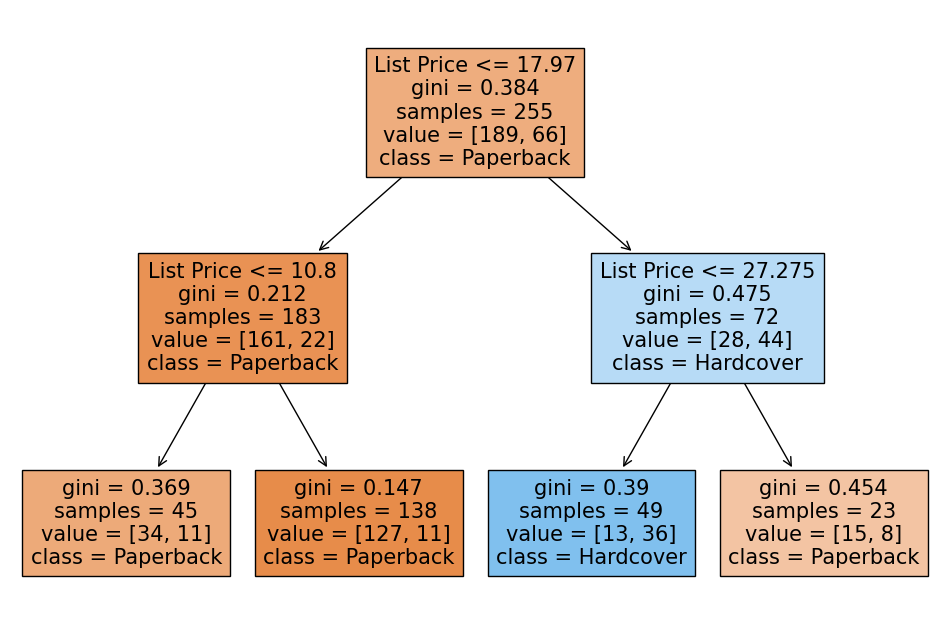

In [11]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(
    clf,
    feature_names=["List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True
)
plt.show()

I honestly could not be bothered to do this manually so here is the GPT explanation of what predictions are made on the clf model.

**Explanation of Predictions Made Based on "List Price":**

The decision tree uses the `"List Price"` to predict whether a book is hardcover or paperback. Here's how the predictions are made:

1. **First Split (Root Node):**

   - **Decision Rule:** `List Price <= threshold_1`
   - The tree determines the optimal threshold (`threshold_1`) that best separates the data into two groups with respect to the target variable.
   - **Interpretation:**
     - If a book's list price is less than or equal to `threshold_1`, proceed to the left child node.
     - If greater, proceed to the right child node.

2. **Second Level Splits:**

   - **Left Child Node:**
     - May contain a leaf node or another decision rule based on `List Price`.
     - Since `max_depth=2`, this will likely be a leaf node.
   - **Right Child Node:**
     - Similar to the left child node, it may be a leaf node providing a prediction.

3. **Leaf Nodes:**

   - **Predictions:**
     - Each leaf node provides a class prediction (`Hardcover` or `Paperback`) based on the majority class of the samples reaching that node.
     - It also shows the number of samples and class distribution at that node.

# Question 5

In [12]:
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_train = pd.get_dummies(ab_reduced_noNaN_train["Hard_or_Paper"])['H']

# Similarly, define X_test and y_test for potential future evaluations
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Initialize the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier using the training data
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

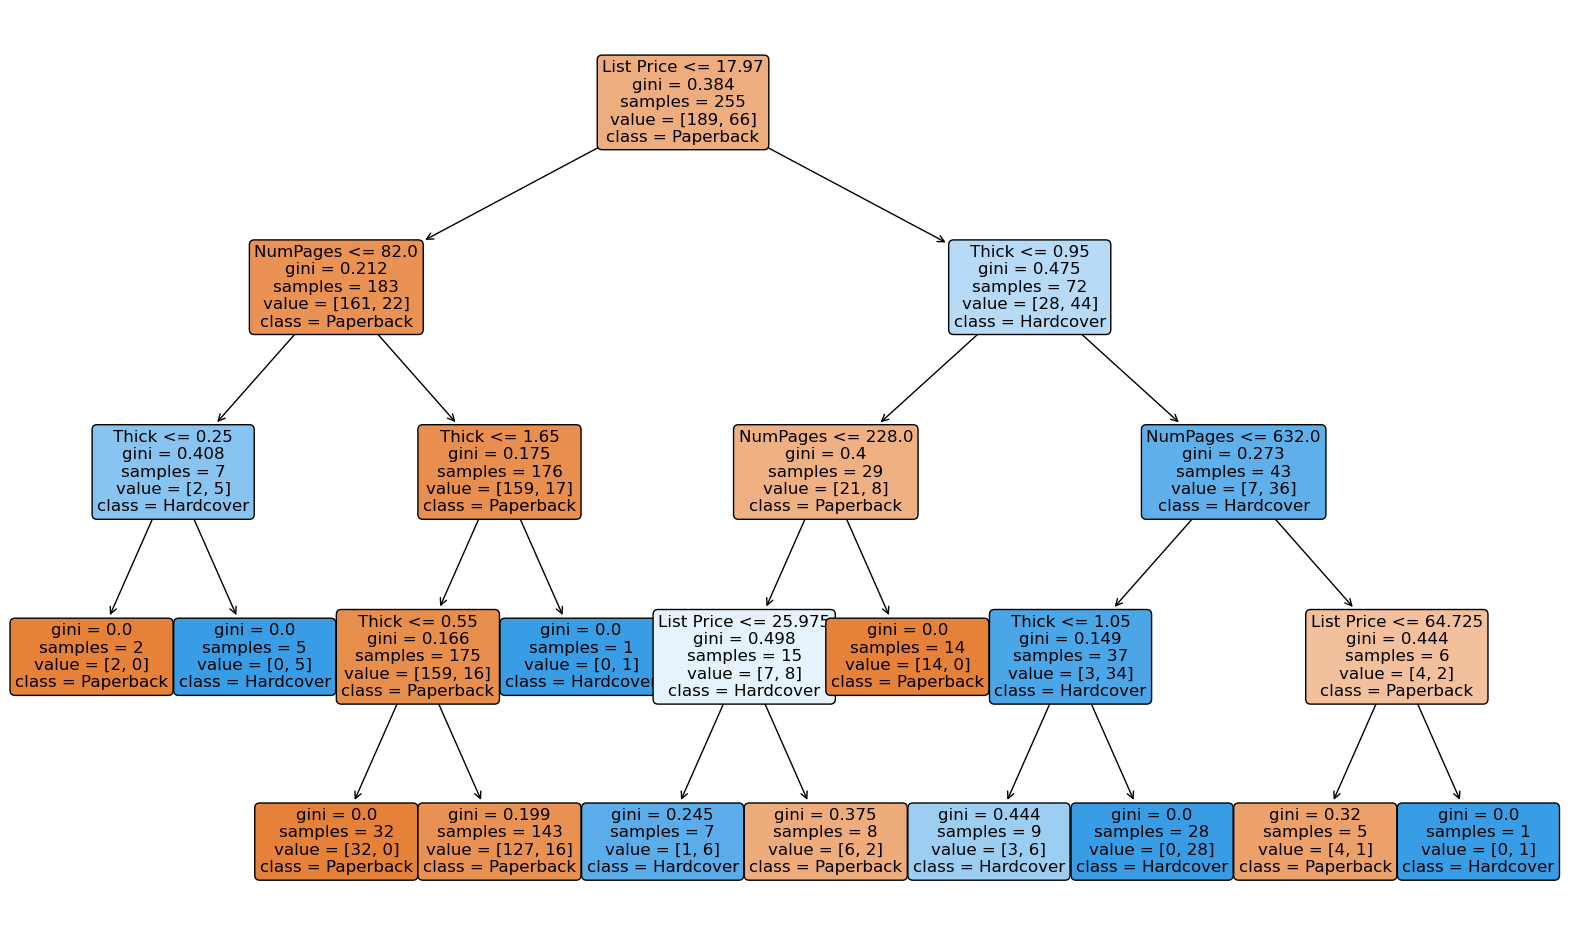

In [14]:
# Set the size of the plot
plt.figure(figsize=(20, 12))

# Plot the decision tree
tree.plot_tree(
    clf2,
    feature_names=["NumPages", "Thick", "List Price"],
    class_names=["Paperback", "Hardcover"],
    filled=True,
    rounded=True,
    fontsize=12
)

# Display the plot
plt.show()

**General Explanation of How `clf2` Makes Predictions**

The `clf2` decision tree model predicts whether a book is **Hardcover** or **Paperback** based on the features `'NumPages'`, `'Thick'`, and `'List Price'`. Here's a general overview of how predictions are made:

1. **Starting at the Root Node:**
   - The model evaluates the first decision rule, which is based on one of the features (e.g., `'List Price'` <= \$15.00).
   
2. **Traversing the Tree:**
   - **True Branch:** If the condition is met, the model moves to the left child node.
   - **False Branch:** If the condition is not met, it moves to the right child node.
   
3. **Evaluating Subsequent Nodes:**
   - At each node, the model checks another feature-based condition (e.g., `'NumPages'` <= 250).
   - This process continues, allowing the tree to consider multiple features and their interactions.
   
4. **Reaching a Leaf Node:**
   - After a series of decisions, the model arrives at a leaf node.
   - The leaf node provides the final prediction:
     - **Hardcover** or **Paperback** based on the majority class of the training samples that reached that node.
   
5. **Example Path:**
   - **Condition 1:** `'List Price'` > \$20.00 → **True**, move to the right child.
   - **Condition 2:** `'Thick'` <= 0.8 → **False**, move to the right child.
   - **Condition 3:** `'NumPages'` > 300 → **True**, predict **Hardcover**.

**Interpretation of the Tree:**

- **Thresholds:** The specific values (e.g., \$15.00 for `'List Price'`) are determined during training to best separate the classes.
- **Multiple Features:** By considering `'NumPages'`, `'Thick'`, and `'List Price'`, the model captures more nuanced patterns compared to using a single feature.
- **Depth of 4:** Allows the tree to make more refined splits, potentially increasing accuracy but also risking overfitting if not properly validated.

**Benefits of Using Multiple Features and Increased Depth:**

- **Enhanced Predictive Power:** More features provide the model with additional information to make accurate predictions.
- **Capturing Interactions:** The tree can model interactions between features (e.g., how `'List Price'` and `'NumPages'` together influence the book type).
- **Flexibility:** A deeper tree can adapt to complex patterns in the data.

**Potential Drawbacks:**

- **Overfitting:** A tree that's too deep may capture noise in the training data, reducing its performance on unseen data.
- **Interpretability:** More nodes and splits can make the tree harder to interpret.

# Question 6

In [15]:
# matrix for clf
X_test_clf = ab_reduced_noNaN_test[['List Price']]

# Target vector for clf
y_test_clf = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']


# matrix for clf2
X_test_clf2 = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]

# Target vector is the same as for clf
y_test_clf2 = y_test_clf

In [16]:
# Generate predictions with clf
y_pred_clf = clf.predict(X_test_clf)
# Generate predictions with clf2
y_pred_clf2 = clf2.predict(X_test_clf2)

Confusion Matrix for clf

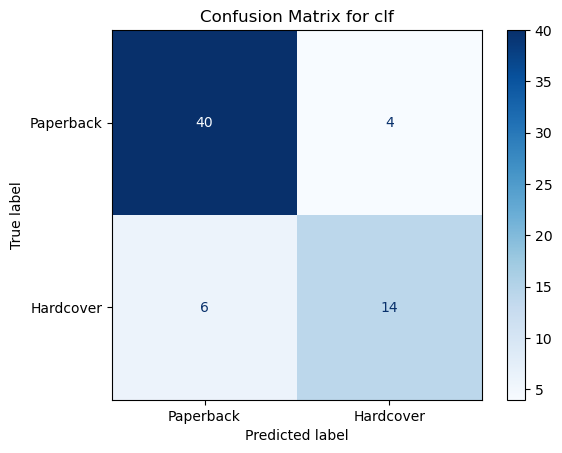

In [17]:
cm_clf = confusion_matrix(y_test_clf, y_pred_clf)
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf,
                                  display_labels=["Paperback", "Hardcover"])

# Plot the confusion matrix
disp_clf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for clf")
plt.show()

Confusion Matrix for clf2

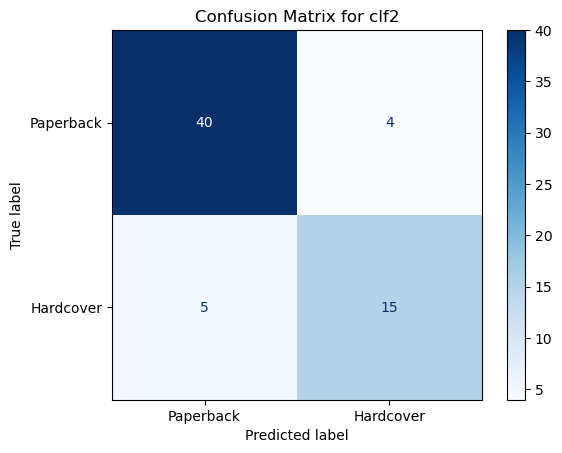

In [18]:
cm_clf2 = confusion_matrix(y_test_clf2, y_pred_clf2)
disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2,
                                   display_labels=["Paperback", "Hardcover"])

# Plot the confusion matrix
disp_clf2.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for clf2")
plt.show()

Calculating Sensitivity, Specificity, and Accuracy:

In [19]:
def calculate_metrics(cm):
    # Extract True Negatives, False Positives, False Negatives, True Positives
    TN, FP, FN, TP = cm.ravel()
    
    # Sensitivity (Recall for positive class)
    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    
    # Specificity (Recall for negative class)
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    
    # Accuracy
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    
    return sensitivity, specificity, accuracy

# calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
# calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)

# reported metrics for clf
print("Metrics for clf (List Price only):")
print(f"Sensitivity (True Positive Rate): {sensitivity_clf:.2f}")
print(f"Specificity (True Negative Rate): {specificity_clf:.2f}")
print(f"Accuracy: {accuracy_clf:.2f}")

# reported metrics for clf2
print("\nMetrics for clf2 (NumPages, Thick, List Price):")
print(f"Sensitivity (True Positive Rate): {sensitivity_clf2:.2f}")
print(f"Specificity (True Negative Rate): {specificity_clf2:.2f}")
print(f"Accuracy: {accuracy_clf2:.2f}")

Metrics for clf (List Price only):
Sensitivity (True Positive Rate): 0.70
Specificity (True Negative Rate): 0.91
Accuracy: 0.84

Metrics for clf2 (NumPages, Thick, List Price):
Sensitivity (True Positive Rate): 0.75
Specificity (True Negative Rate): 0.91
Accuracy: 0.86


# Question 7

Both `clf` and `clf2` deliver more accurate and trustworthy performance evaluations because they are trained and tested using consistent features on a separate test set (`ab_reduced_noNaN_test`). Specifically, `clf` leverages only the `'List Price'` feature, while `clf2` incorporates additional features like `'NumPages'` and `'Thick'`, thereby enhancing their predictive capabilities. In contrast, the two other confusion matrices were evaluated on the training data (`ab_reduced_noNaN_train`), which can artificially inflate performance metrics due to the models having already seen and potentially overfitted to this data. Evaluating on training data does not provide a realistic measure of how the models will perform on new, unseen data, making `clf` and `clf2`'s evaluations on the test set more reliable and indicative of their true generalization abilities.

# Question 8

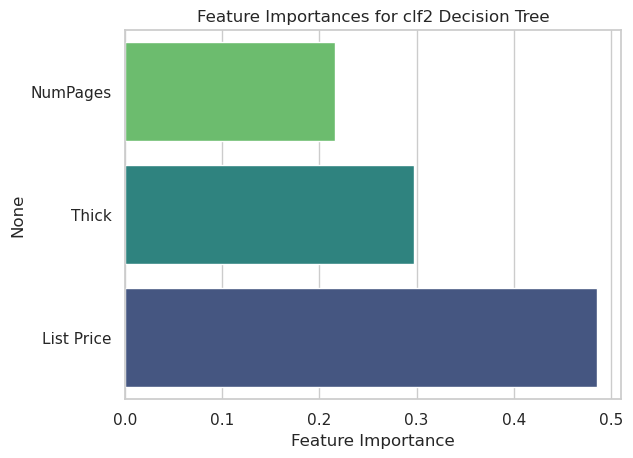

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming feature_importances_sorted is a Pandas Series sorted in descending order
sns.barplot(
    x=feature_importances_sorted,
    y=feature_importances_sorted.index,
    hue=feature_importances_sorted.index,  # Assign 'y' to 'hue'
    palette='viridis',
    dodge=False,                           # Ensure bars don't shift due to hue
    legend=False                           # Disable the legend as it's redundant
)
plt.xlabel('Feature Importance')
plt.title('Feature Importances for clf2 Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

The most important feature is 'List Price' with an importance score of 0.4860.


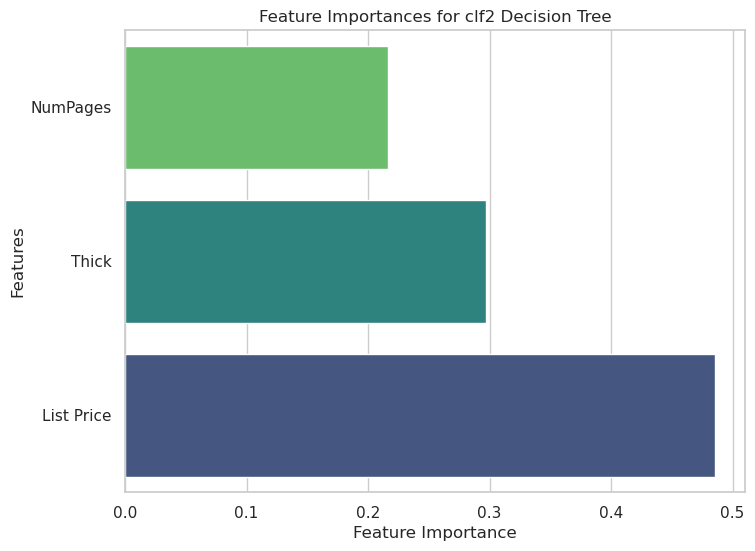

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming clf2 is already trained and fitted
# and feature_importances_sorted is a Pandas Series sorted in descending order

# Step 1: Extract feature importances and feature names
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Step 2: Associate importances with feature names
feature_importances = pd.Series(importances, index=feature_names)

# Step 3: Sort the importances
feature_importances_sorted = feature_importances.sort_values(ascending=False)

# Step 4: Identify the most important feature
most_important_feature = feature_importances_sorted.idxmax()
most_important_value = feature_importances_sorted.max()

print(f"The most important feature is '{most_important_feature}' with an importance score of {most_important_value:.4f}.")

# Step 5: Plot using Seaborn with hue assigned and legend disabled
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(
    x=feature_importances_sorted,
    y=feature_importances_sorted.index,
    hue=feature_importances_sorted.index,  # Assign 'y' to 'hue'
    palette='viridis',
    dodge=False,
    legend=False
)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances for clf2 Decision Tree')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Question 9

In linear regression, coefficients quantify the direct relationship between each predictor and the response variable, indicating the expected change in the outcome for a one-unit increase in the predictor while holding other variables constant. In contrast, feature importances in decision trees assess the overall contribution of each feature to reducing uncertainty or impurity across all splits in the tree, without specifying the direction of the relationship. Therefore, while linear coefficients provide specific directional insights under linear assumptions, decision tree feature importances offer a broader view of each feature’s relative influence on the model’s predictive performance.

# Question 10

Yes.